In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import networkx as nx
import numpy.fft
import random
import bct

from source.utils.flexibility_utils import *

 #constant for our research purposes
#needs to be the path to where the data is
data_path = '/Users/nivaranavat/BrainConnectivity_ResearchProject/Data'

In [2]:
# #create our random time series
#utils.getRandomTimeSeries(path, min_freq = 0.01, max_freq = 0.1, samples = 200, samplerate =2, amt = 12)

In [3]:
# #phase scramble the drugs that we have
# #calculate the small worldness of each brain observed with the scrambled brain
# #need to figure out a threshold 

# drug_list = ("SAL", "COC", "MDPV")
# utils.phaseScrambled(drug_list, path, filesize = 200, iterations = 5, threshold = 0.15)


RANDOM
SAL
OrgSCRSAL
SCRSAL
COC
OrgSCRCOC
SCRCOC
MDPV
OrgSCRMDPV
SCRMDPV
row:  10 col:  3 index:  1
drug_type:  RANDOM y_value:  μ y_range:  [-1, 1]
df:           30        60        90        120       150
0   0.652517  0.733660  0.696054  0.725279  0.721959
1   0.671265  0.737660  0.729932  0.730558  0.717197
2   0.628925  0.719891  0.698694  0.703020  0.726476
3   0.671293  0.684435  0.686395  0.656762  0.678095
4   0.646721  0.730748  0.702150  0.707483  0.761769
5   0.649116  0.738286  0.730041  0.738503  0.745741
6   0.664490  0.697306  0.730993  0.723102  0.735537
7   0.666857  0.705088  0.669878  0.714721  0.716299
8   0.681469  0.701197  0.693823  0.712272  0.739565
9   0.648952  0.696354  0.709850  0.721850  0.727864
10  0.689224  0.660272  0.683619  0.684109  0.661687
11  0.641551  0.708463  0.720952  0.716490  0.714286
row:  10 col:  3 index:  2
drug_type:  RANDOM y_value:  σ y_range:  [-1, 1]
df:           30        60        90        120       150
0   0.025740  0.026229 

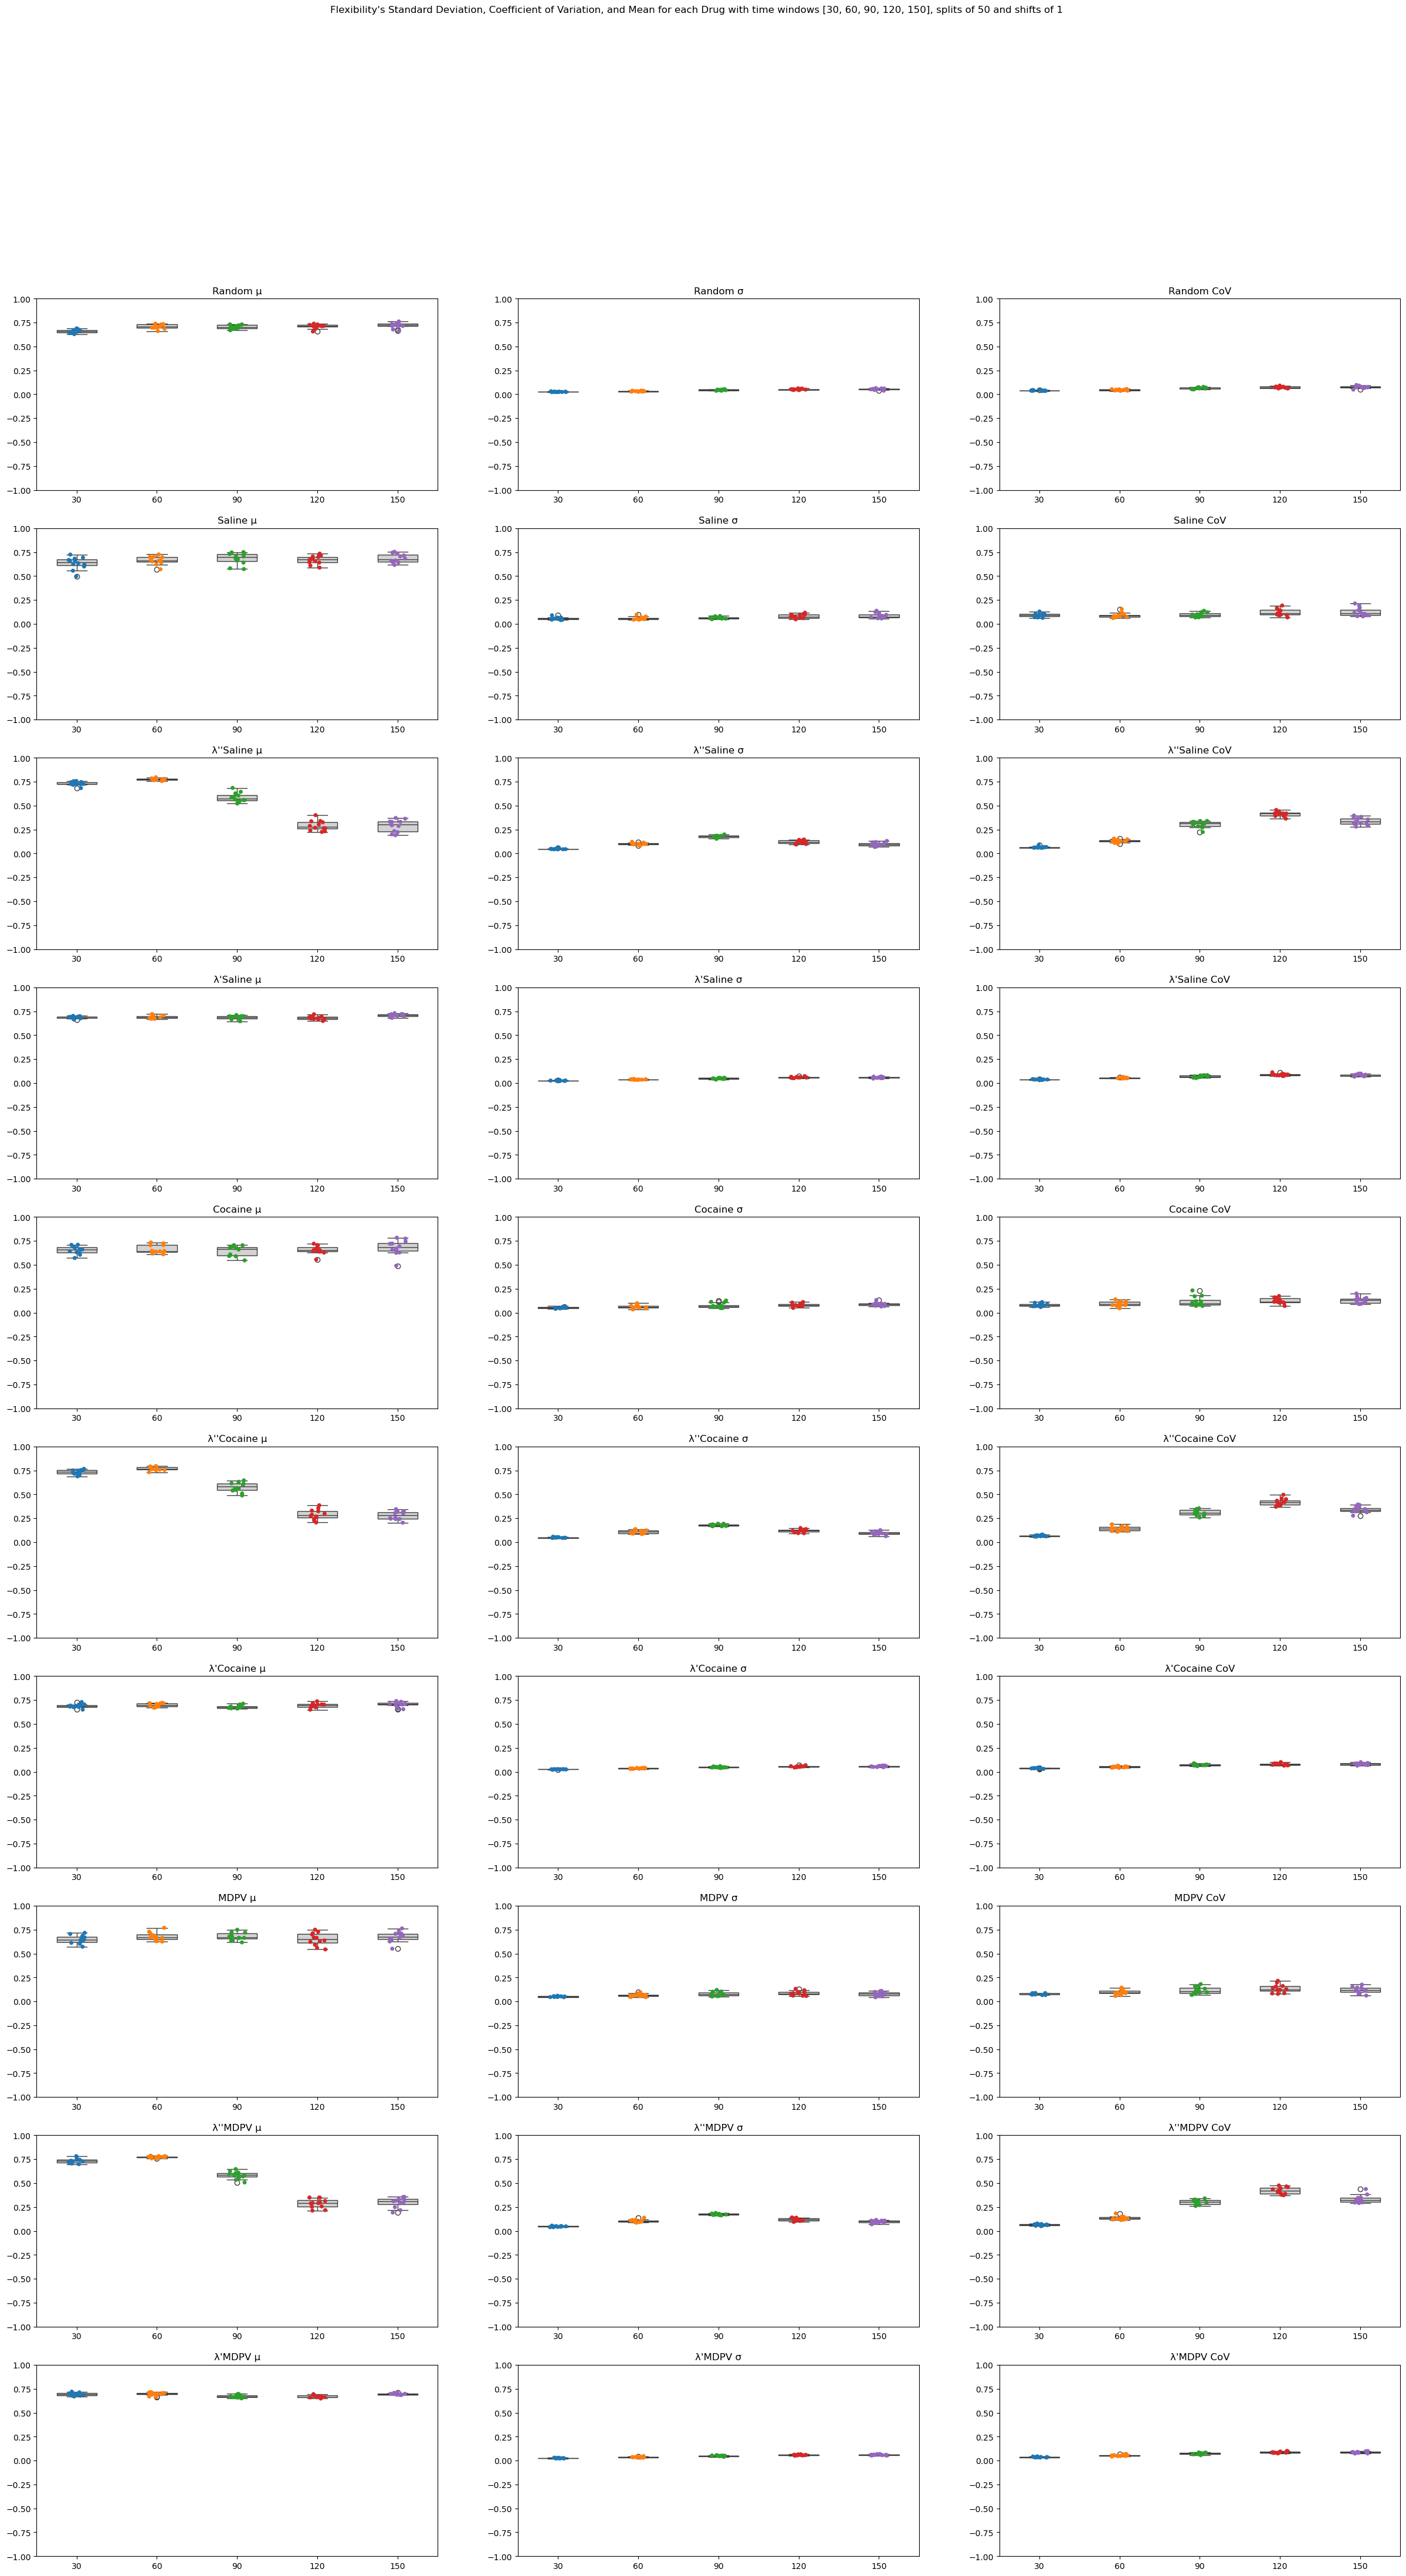

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [4]:
# --- Calculate flexibility metrics for each dataset and plot results ---

# List of all drug/network conditions to analyze
drug_list = (
    "RANDOM", "SAL", "OrgSCRSAL", "SCRSAL", "COC", "OrgSCRCOC", "SCRCOC",
    "MDPV", "OrgSCRMDPV", "SCRMDPV"
)

# Plotting ranges for each drug/condition, for mean, coefficient of variation (cov), and standard deviation (sdv)
# plot_ranges = {
#     "RANDOM":     {"mean": [0, 0.11],  "cov": [0.15, 2],   "sdv": [0, 0.04]},
#     "SAL":        {"mean": [0, 0.11],  "cov": [0.15, 2.6], "sdv": [0, 0.04]},
#     "OrgSCRSAL":  {"mean": [0, 0.125], "cov": [0.15, 2],   "sdv": [0, 0.04]},
#     "SCRSAL":     {"mean": [0, 0.11],  "cov": [0.15, 2],   "sdv": [0, 0.04]},
#     "COC":        {"mean": [0, 0.11],  "cov": [0.15, 2.6], "sdv": [0, 0.04]},
#     "OrgSCRCOC":  {"mean": [0, 0.125], "cov": [0.15, 2],   "sdv": [0, 0.04]},
#     "SCRCOC":     {"mean": [0, 0.15],  "cov": [0.15, 2],   "sdv": [0, 0.04]},
#     "MDPV":       {"mean": [0, 0.11],  "cov": [0.15, 2.6], "sdv": [0, 0.04]},
#     "OrgSCRMDPV": {"mean": [0, 0.125], "cov": [0.15, 2],   "sdv": [0, 0.04]},
#     "SCRMDPV":    {"mean": [0, 0.11],  "cov": [0.15, 2],   "sdv": [0, 0.04]},
# }

plot_ranges = {
    "RANDOM":     {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "SAL":        {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "OrgSCRSAL":  {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "SCRSAL":     {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "COC":        {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "OrgSCRCOC":  {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "SCRCOC":     {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "MDPV":       {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "OrgSCRMDPV": {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "SCRMDPV":    {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
}

# List of window sizes (in timepoints) to use for flexibility calculation
timepoints = [30, 60, 90, 120, 150]

# Output folder for saving results
folder_name = "results/timewindows[30,60,90,120,150]"

# Run the flexibility calculation for all drugs and time windows
# Returns: flexibility (dict of stats), fig (matplotlib Figure with boxplots)
flexibility, fig = calculate_flexibility(
    data_path, drug_list, timepoints, plot_ranges, folder_name
)

# Add a title to the figure summarizing the analysis parameters
fig.suptitle(
    "Flexibility's Standard Deviation, Coefficient of Variation, and Mean for each Drug "
    f"with time windows {timepoints}, splits of 50 and shifts of 1"
)

# Save the resulting figure to disk
fig.savefig("./results/FlexibilityPlots/flexibility__with_timepoints[30,60,90,120,150].png")


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


RANDOM


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


SAL


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


OrgSCRSAL


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


SCRSAL


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


COC


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


OrgSCRCOC


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


SCRCOC


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


MDPV


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


OrgSCRMDPV


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


SCRMDPV
row:  10 col:  3 index:  1
drug_type:  RANDOM y_value:  μ y_range:  [-1, 1]
df:            1         3         5         7         10
0   0.698909  0.704242  0.730909  0.735273  0.740000
1   0.715758  0.776000  0.770545  0.751515  0.756364
2   0.682061  0.688727  0.751152  0.696000  0.754909
3   0.682424  0.736485  0.693818  0.667758  0.730788
4   0.686909  0.763152  0.705091  0.725576  0.778909
5   0.670182  0.709818  0.720485  0.731515  0.710061
6   0.729576  0.757455  0.755758  0.727152  0.755152
7   0.623030  0.667152  0.649333  0.745697  0.748485
8   0.706424  0.692000  0.698061  0.739515  0.732485
9   0.674667  0.757333  0.763879  0.797576  0.772364
10  0.682909  0.697818  0.687030  0.710909  0.771758
11  0.721091  0.739152  0.719030  0.732606  0.708485
row:  10 col:  3 index:  2
drug_type:  RANDOM y_value:  σ y_range:  [-1, 1]
df:            1         3         5         7         10
0   0.077181  0.071556  0.062738  0.068594  0.059779
1   0.063936  0.055599  0.063182  0

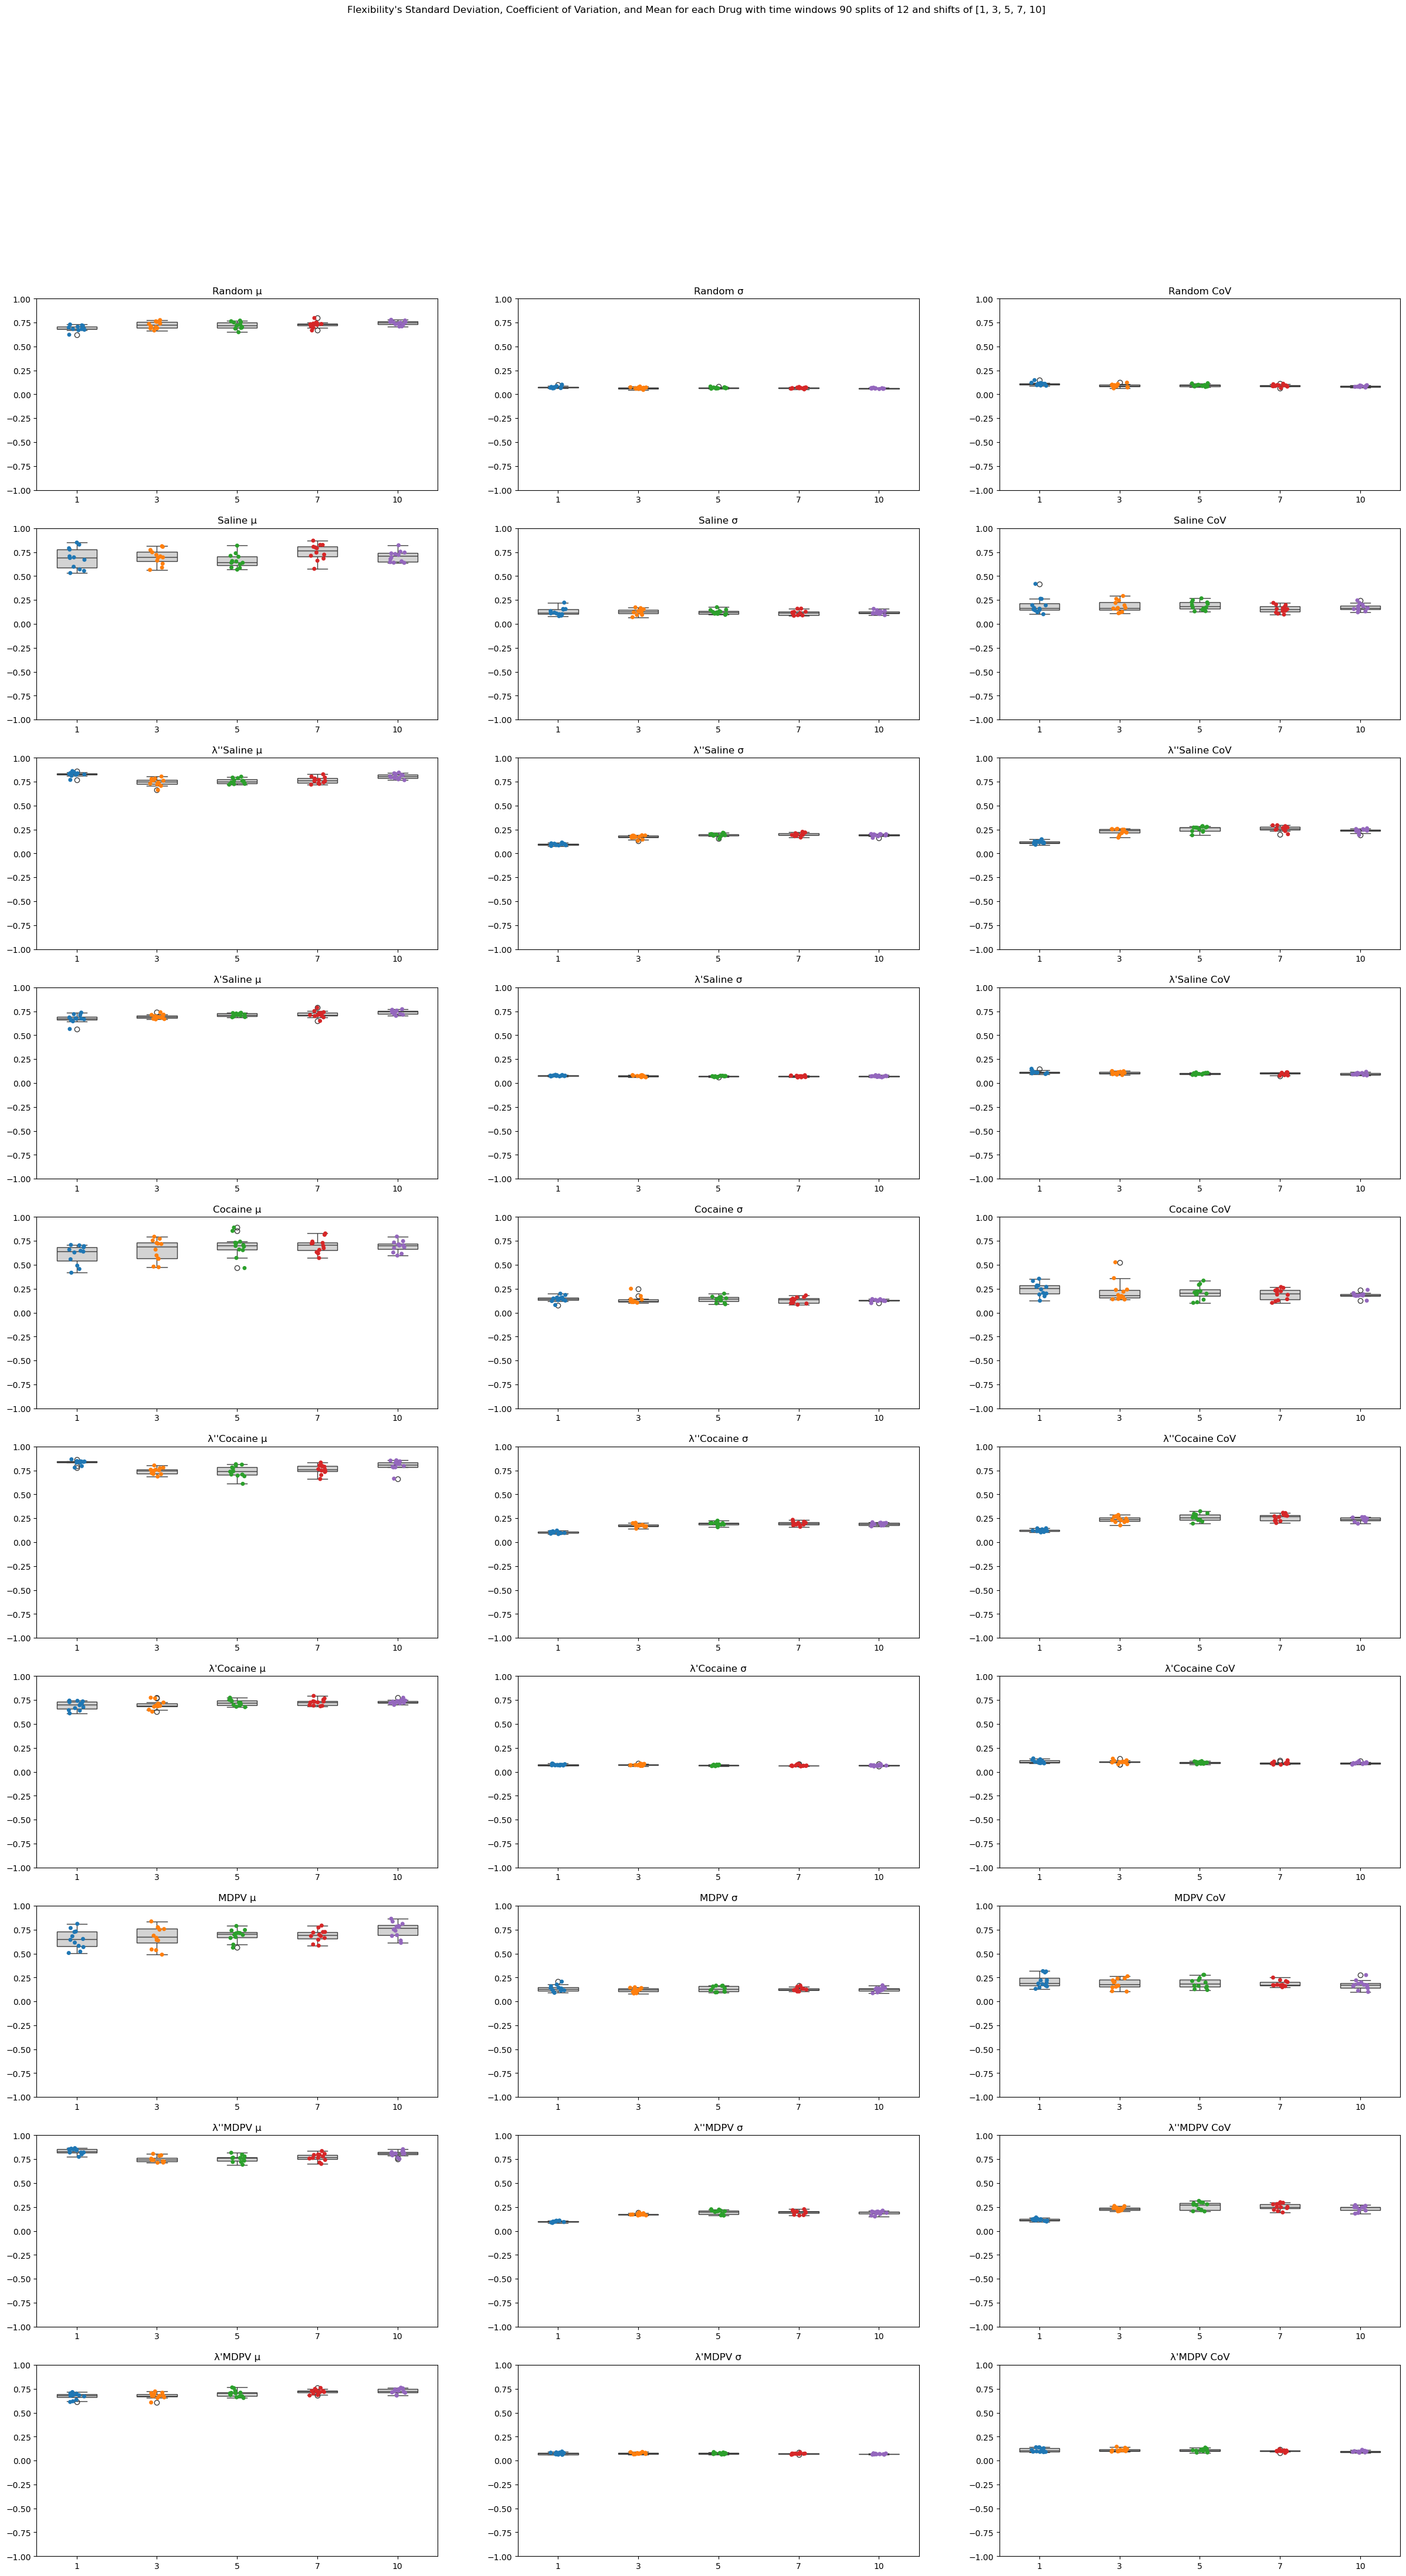

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [5]:
#calculate flexibility of each every data set we have with the time shifts
drug_list = ("RANDOM","SAL", "OrgSCRSAL","SCRSAL","COC","OrgSCRCOC","SCRCOC", "MDPV","OrgSCRMDPV","SCRMDPV")
# plot_ranges = {"RANDOM" : {"sdv" : [0,0.15], "cov" : [0.15, 2.5] , "mean": [0,0.35] } ,
#               "SAL" : {"sdv" : [0,0.15], "cov" : [0.15, 5.25] , "mean": [0,0.35] }, 
#                "OrgSCRSAL" : {"sdv" : [0,0.15], "cov" : [0.15, 2.5] , "mean": [0,0.4] },
#               "SCRSAL" : {"sdv" : [0,0.15], "cov" : [0.15, 2.5] , "mean": [0,0.35] },
#               "COC": {"sdv" : [0,0.15], "cov" : [0.15, 5.25] , "mean": [0,0.35] },
#                "OrgSCRCOC": {"sdv" : [0,0.15], "cov" : [0.15, 2.5] , "mean": [0,0.4] },
#               "SCRCOC": {"sdv" : [0,0.15], "cov" : [0.15, 2.5] , "mean": [0,0.35] },
#               "MDPV": {"sdv" : [0,0.15], "cov" : [0.15, 5.25] , "mean": [0,0.35] },
#                "OrgSCRMDPV": {"sdv" : [0,0.15], "cov" : [0.15, 2.5] , "mean": [0,0.4] },
#               "SCRMDPV": {"sdv" : [0,0.15], "cov" : [0.15, 2.5] , "mean": [0,0.35] }}

plot_ranges = {
    "RANDOM":     {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "SAL":        {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "OrgSCRSAL":  {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "SCRSAL":     {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "COC":        {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "OrgSCRCOC":  {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "SCRCOC":     {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "MDPV":       {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "OrgSCRMDPV": {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "SCRMDPV":    {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
}

timepoints = 90
splits = 12
shifts = [1,3,5,7,10]
folder_name = "results/timeshifts[1,3,5,7,10]"
flexibility,fig, small_worldness = calculate_flexilibity_with_timeshifts_and_save(timepoints, splits, shifts, drug_list, data_path, plot_ranges, folder_name)
fig.suptitle(f"Flexibility's Standard Deviation, Coefficient of Variation, and Mean for each Drug with time windows {timepoints} splits of {splits} and shifts of {shifts}")
fig.savefig("./results/FlexibilityPlots/flexibility_with_timewindow90_timeshifts[1,3,5,7,10].png")


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/BrainConnectivity_ResearchProject/source/utils/phase_utils.py:280: RuntimeWarning: divide by zero encountered in double_scalars
  ccoef_ratio = observed_ccoef/randomized_ccoef
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum

RANDOM


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, 

SAL


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, 

OrgSCRSAL


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/BrainConnectivity_ResearchProject/source/utils/phase_utils.py:280: RuntimeWarning: divide by zero encountered in double_scalars
  ccoef_ratio = observed_ccoef/randomized_ccoef
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum

SCRSAL


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, 

COC


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, 

OrgSCRCOC


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/BrainConnectivity_ResearchProject/source/utils/phase_utils.py:280: RuntimeWarning: divide by zero encountered in double_scalars
  ccoef_ratio = observed_ccoef/randomized_ccoef
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum

SCRCOC


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/BrainConnectivity_ResearchProject/source/utils/phase_utils.py:280: RuntimeWarning: invalid value encountered in double_scalars
  ccoef_ratio = observed_ccoef/randomized_ccoef
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(

MDPV


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, 

OrgSCRMDPV


/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/BrainConnectivity_ResearchProject/source/utils/phase_utils.py:280: RuntimeWarning: divide by zero encountered in double_scalars
  ccoef_ratio = observed_ccoef/randomized_ccoef
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))
/Users/nivaranavat/miniconda/envs/brain-env/lib/python3.10/statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum

SCRMDPV
row:  10 col:  3 index:  1
drug_type:  RANDOM y_value:  μ y_range:  [-1, 1]
df:             5
0   0.688395
1   0.729630
2   0.737877
3   0.728099
4   0.707457
5   0.738074
6   0.732790
7   0.769037
8   0.732790
9   0.719753
10  0.722568
11  0.722272
row:  10 col:  3 index:  2
drug_type:  RANDOM y_value:  σ y_range:  [-1, 1]
df:             5
0   0.039342
1   0.040443
2   0.039594
3   0.041442
4   0.043887
5   0.037860
6   0.038841
7   0.038605
8   0.036800
9   0.037813
10  0.042394
11  0.040741
row:  10 col:  3 index:  3
drug_type:  RANDOM y_value:  CoV y_range:  [-1, 1]
df:             5
0   0.057151
1   0.055430
2   0.053659
3   0.056918
4   0.062035
5   0.051296
6   0.053004
7   0.050199
8   0.050219
9   0.052536
10  0.058671
11  0.056406
row:  10 col:  3 index:  4
drug_type:  SAL y_value:  μ y_range:  [-1, 1]
df:             5
0   0.722963
1   0.685185
2   0.705185
3   0.666420
4   0.713086
5   0.691111
6   0.570864
7   0.743210
8   0.608395
9   0.633580
10  0.741975
11  0.

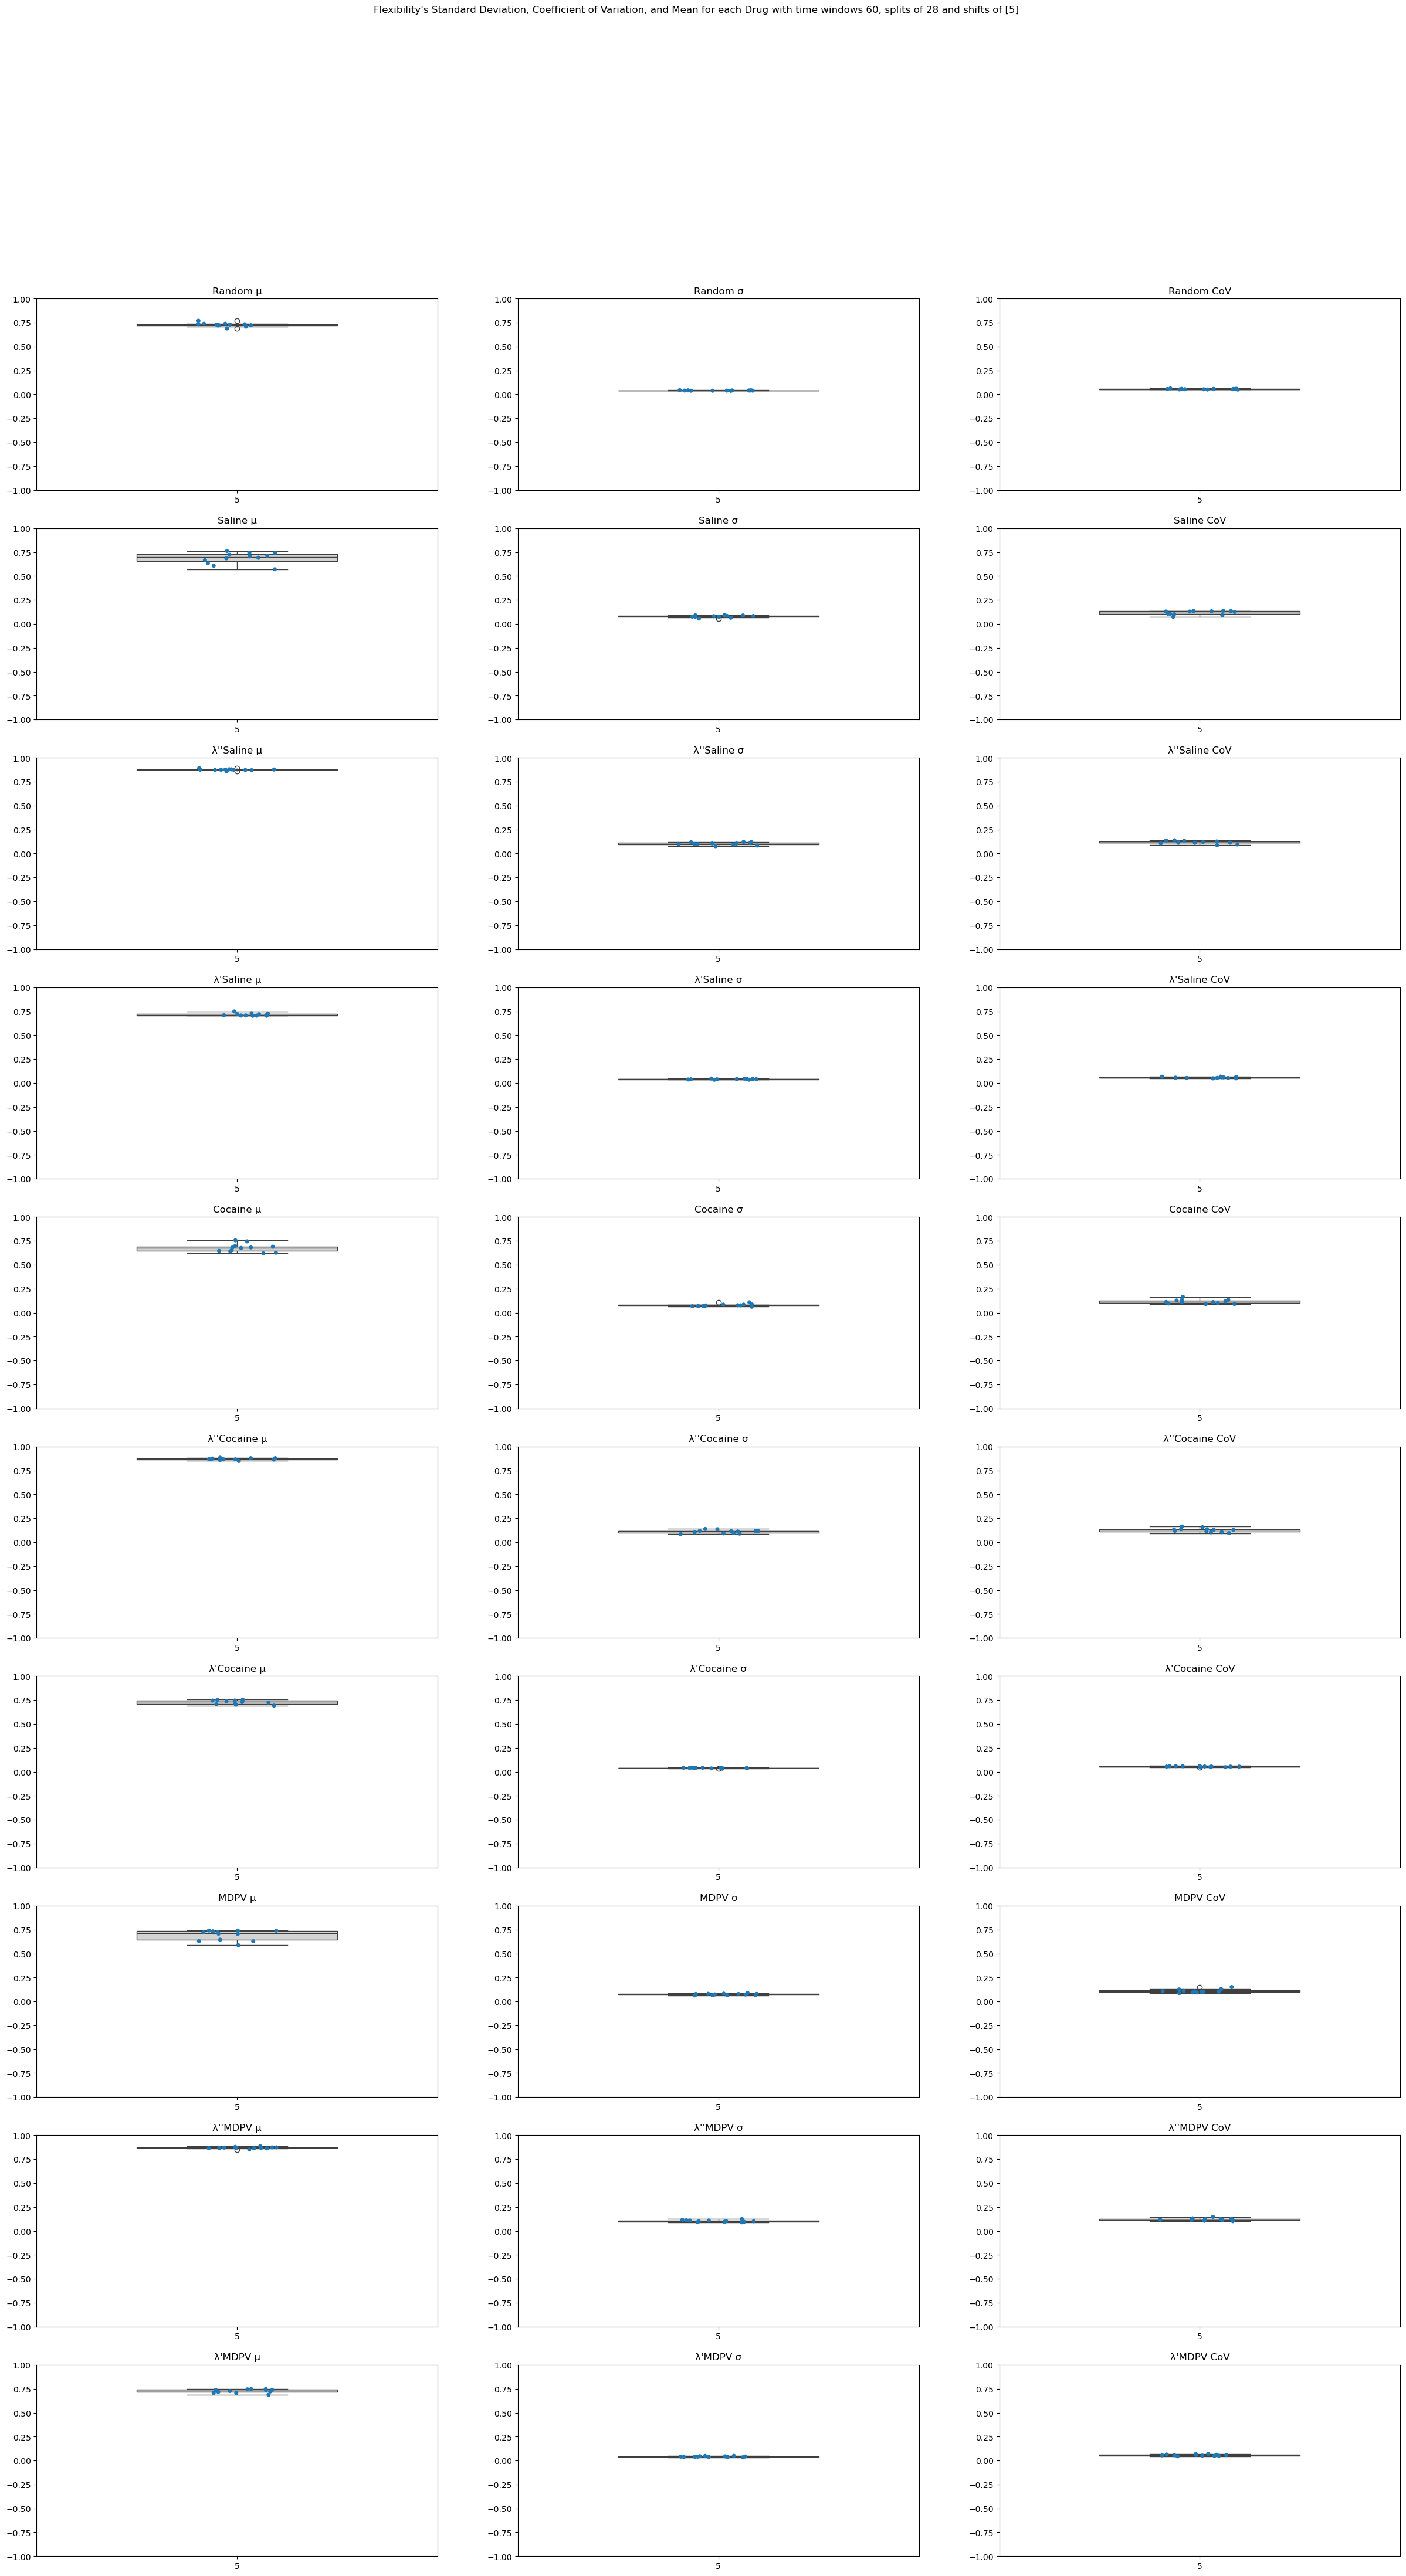

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [6]:
#calculate flexibility of each every data set we have with the time shifts
drug_list = ("RANDOM","SAL", "OrgSCRSAL","SCRSAL","COC","OrgSCRCOC","SCRCOC", "MDPV","OrgSCRMDPV","SCRMDPV")
# plot_ranges = {"RANDOM" : {"sdv" : [0.03,0.1], "cov" : [0, 1] , "mean": [0.07,0.25] } ,
#               "SAL" : {"sdv" : [0.03,0.1], "cov" : [0, 1] , "mean": [0.07,0.25] }, 
#                "OrgSCRSAL" : {"sdv" : [0.03,0.1], "cov" : [0, 1] , "mean": [0.07,0.25] },
#               "SCRSAL" : {"sdv" : [0.03,0.1], "cov" : [0, 1] , "mean": [0.07,0.25] },
#               "COC": {"sdv" : [0.03,0.1], "cov" : [0, 1] , "mean": [0.07,0.25] },
#                "OrgSCRCOC": {"sdv" : [0.03,0.1], "cov" : [0, 1] , "mean": [0.07,0.25] },
#               "SCRCOC": {"sdv" : [0.03,0.1], "cov" : [0, 1] , "mean": [0.07,0.25] },
#               "MDPV": {"sdv" : [0.03,0.1], "cov" : [0, 1] , "mean": [0.07,0.25] },
#                "OrgSCRMDPV": {"sdv" : [0.03,0.1], "cov" : [0,1] , "mean": [0.07,0.25] },
#               "SCRMDPV": {"sdv" : [0.03,0.1], "cov" : [0,1] , "mean": [0.07,0.25] }}

plot_ranges = {
    "RANDOM":     {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "SAL":        {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "OrgSCRSAL":  {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "SCRSAL":     {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "COC":        {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "OrgSCRCOC":  {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "SCRCOC":     {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "MDPV":       {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "OrgSCRMDPV": {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
    "SCRMDPV":    {"mean": [-1, 1],  "cov": [-1, 1],   "sdv": [-1, 1]},
}
timepoints = 60
splits = 28
shifts = [5]
folder_name = "results/timeshift5_splits28"
#need to take the small worldness average here
flexibility,fig,small_worldness = calculate_flexilibity_with_timeshifts_and_save(timepoints, splits, shifts, drug_list, data_path,plot_ranges,folder_name, small_worldness_calc = True)
fig.suptitle(f"Flexibility's Standard Deviation, Coefficient of Variation, and Mean for each Drug with time windows {timepoints}, splits of {splits} and shifts of {shifts}")
fig.savefig("./results/FlexibilityPlots/flexibility_with_timewindow60_timeshifts5_28splits.png")

In [7]:
print(f"Small Worldness with timeshifts {shifts} calculated with {timepoints} size time window")
    
import os
    
if not os.path.isdir("small_worldness"):
    os.makedirs("small_worldness")
for drug in drug_list:
    filename  = "small_worldness/" + drug + ".txt"
    with open(filename,"w") as f:
            for key, value in small_worldness[drug][0].items(): 
                f.write('%s:%s\n' % ( key,value[0][1]))

Small Worldness with timeshifts [5] calculated with 60 size time window


row:  1 col:  1 index:  1
drug_type:   y_value:  σ y_range:  [0.02, 0.1]
df:        Random    Saline  λ''Saline  λ'Saline   Cocaine  λ''Cocaine  λ'Cocaine  \
0   0.039342  0.076350   0.120786  0.046000  0.068972    0.117096   0.044488   
1   0.040443  0.092395   0.104582  0.042412  0.071344    0.102618   0.043549   
2   0.039594  0.088361   0.118787  0.037481  0.084186    0.117220   0.040163   
3   0.041442  0.086119   0.099085  0.041993  0.083743    0.136490   0.041563   
4   0.043887  0.064177   0.103896  0.034530  0.107995    0.139130   0.041121   
5   0.037860  0.089589   0.082953  0.047821  0.067521    0.092736   0.036426   
6   0.038841  0.075321   0.093102  0.039388  0.085899    0.112592   0.032545   
7   0.038605  0.055542   0.117494  0.040018  0.076680    0.118000   0.035556   
8   0.036800  0.082635   0.097770  0.035412  0.062055    0.090171   0.040451   
9   0.037813  0.084582   0.076121  0.046416  0.075674    0.097556   0.043229   
10  0.042394  0.074740   0.099695  0.03984

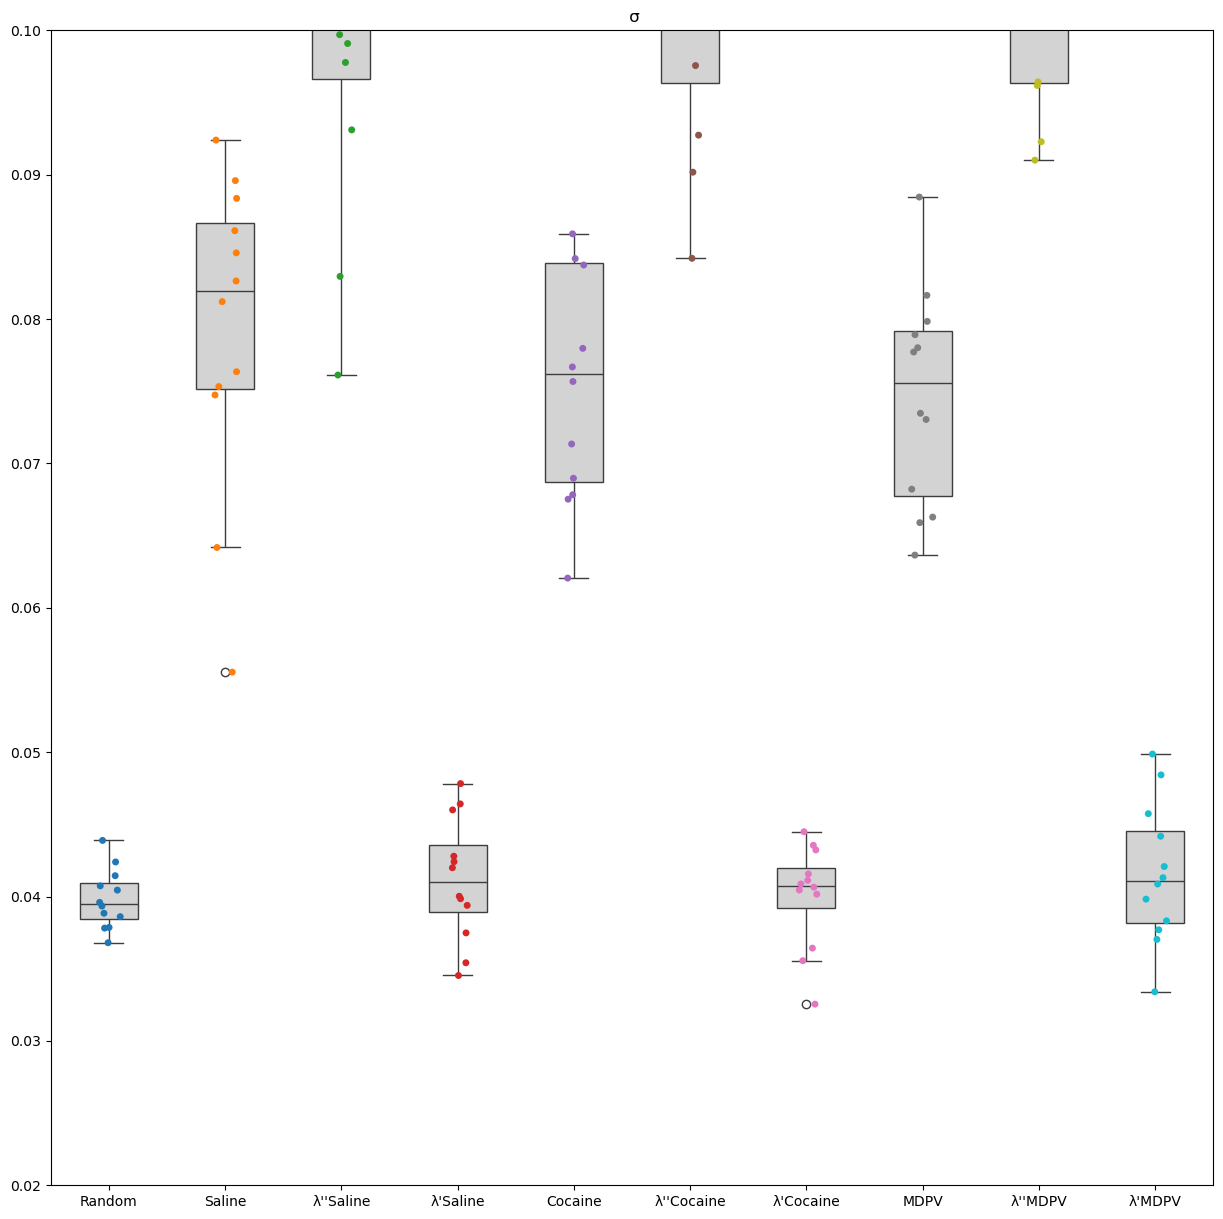

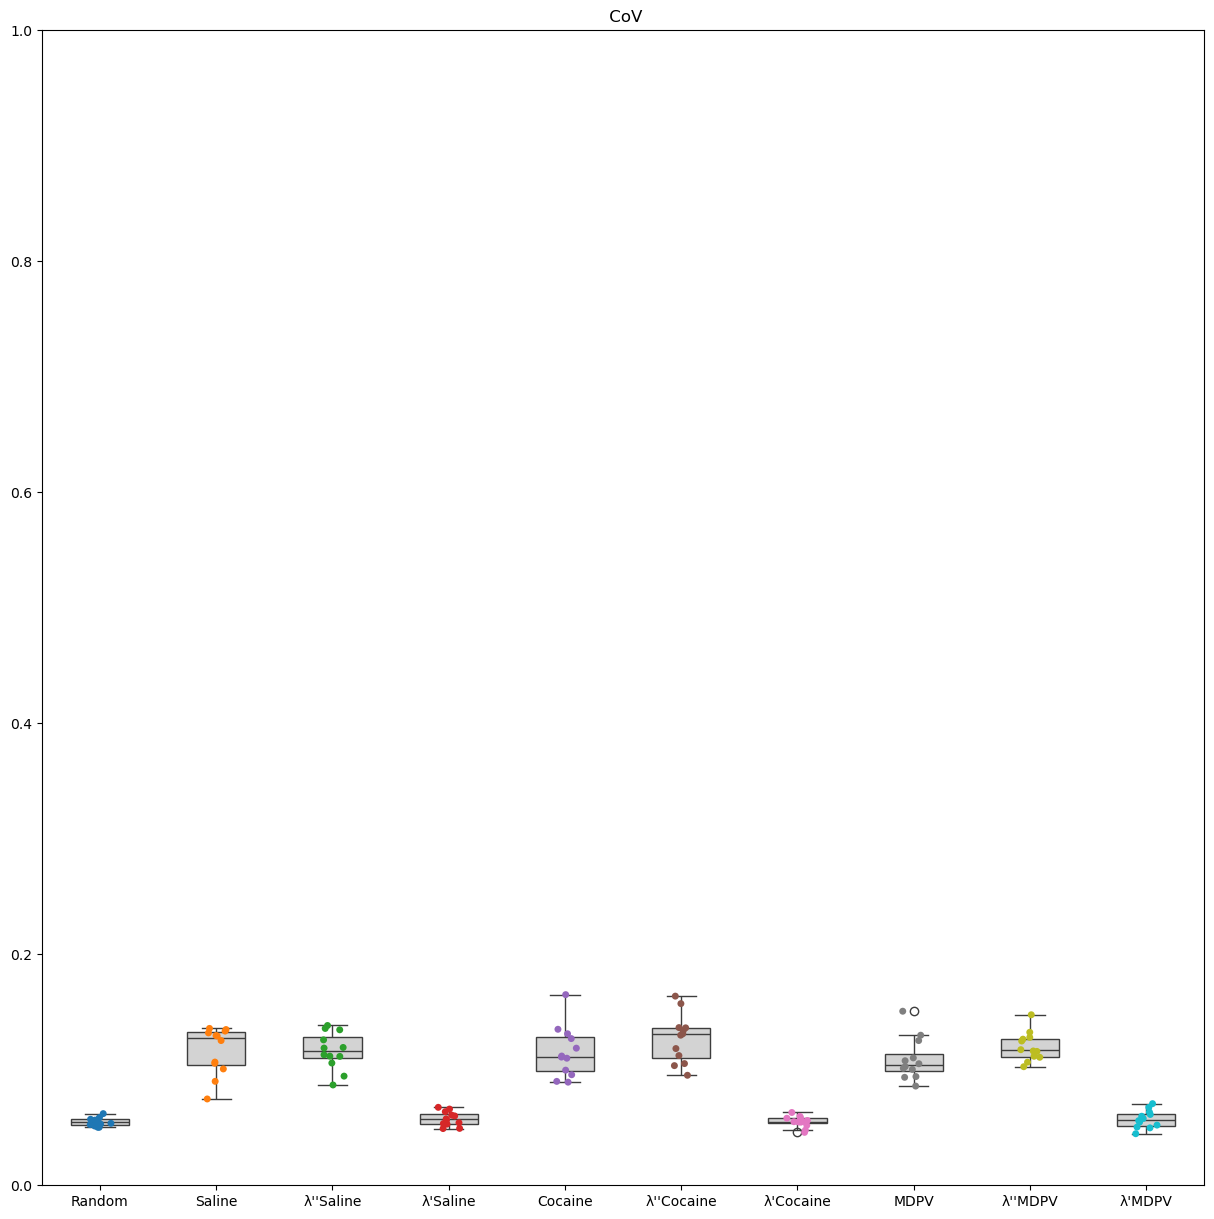

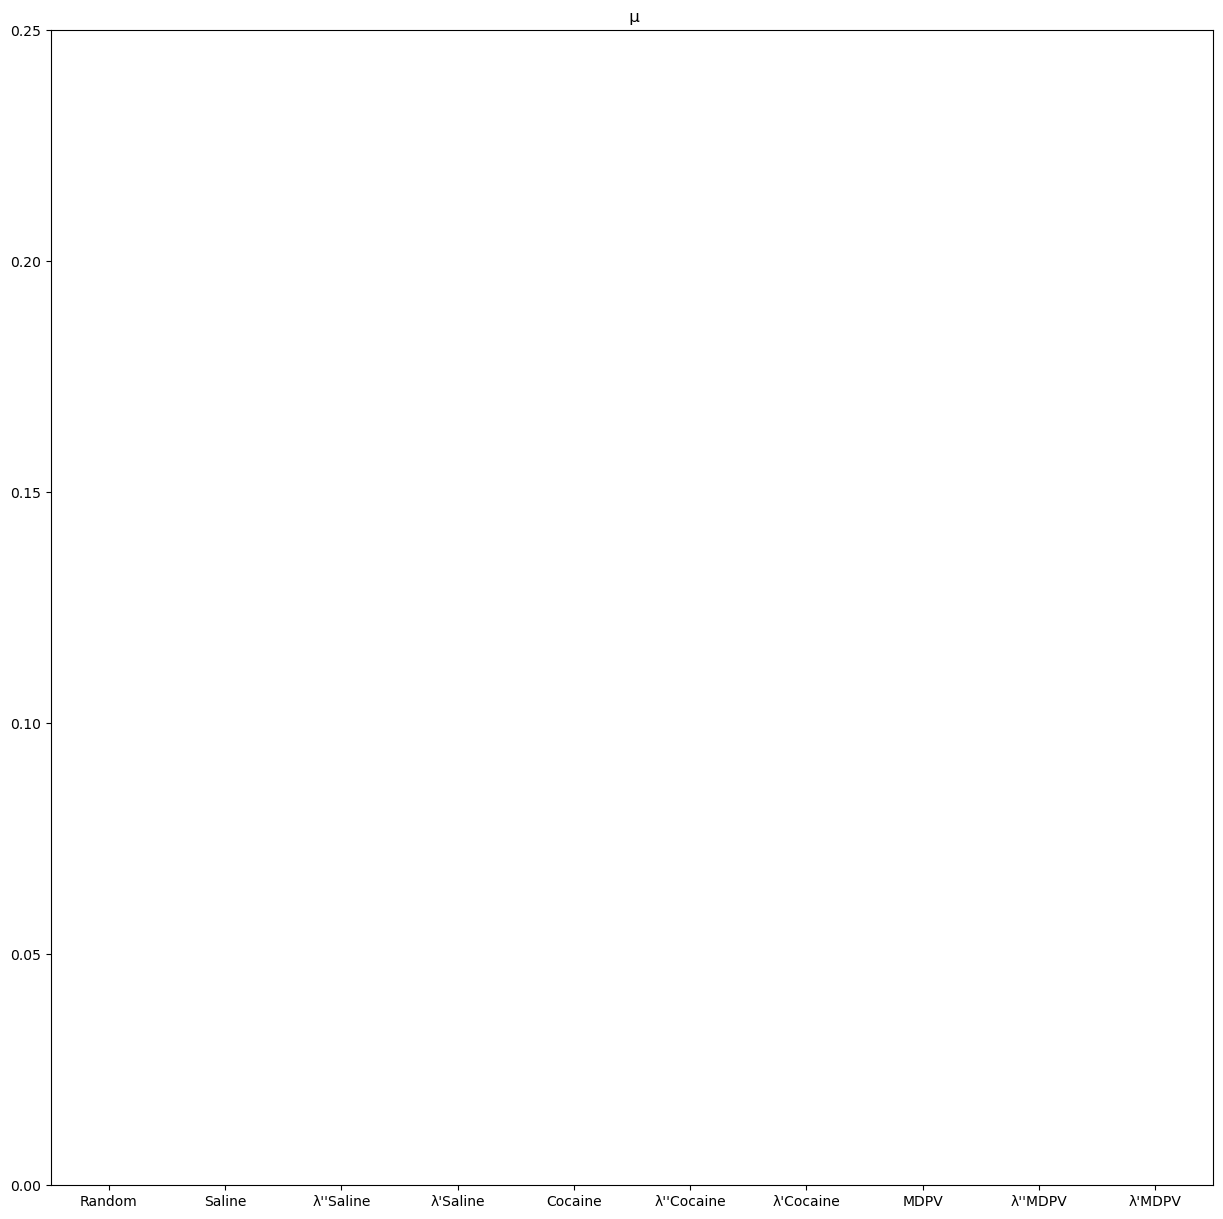

In [8]:
from matplotlib import pyplot as plt
#draw out our last plot that is going to cover all the values calculated for the specified parameters
drug_sdv = {}
drug_cov = {}
drug_mean = {}

drug_names = {"SAL" : "Saline" , "COC" : "Cocaine", "MDPV" : "MDPV", "RANDOM": "Random"} #mapping of the abbreivated name to full name of drug

for drug, flex in flexibility.items():
    if drug in drug_names:
        name = drug_names[drug]
    if "SCR" in drug:
        name = "\u03BB'" + drug_names[drug.split("SCR")[1]]
    if "OrgSCR" in drug:
        name = "\u03BB''" + drug_names[drug.split("SCR")[1]]
    drug_sdv[name] = flex[0][5]
    drug_cov[name] = flex[1][5]
    drug_mean[name] = flex[2][5]

fig = plt.figure(figsize = (15,15))
box_plot(drug_sdv, (1,1,1), fig, "", "\u03C3", [0.02,0.1])
fig.savefig("./results/FlexibilityPlots/sdv_window60_shift5.png")
    

fig = plt.figure(figsize = (15,15))
box_plot(drug_cov, (1,1,1), fig, "", "CoV", [0, 1])
fig.savefig("./results/FlexibilityPlots/cov_window60_shift5.png")


fig = plt.figure(figsize = (15,15))
box_plot(drug_mean, (1,1,1), fig, "", "\u03BC", [0,0.25])
fig.savefig("./results/FlexibilityPlots/mean_window60_shift5.png")
    